In [104]:
import numpy as np
import pandas as pd

In [108]:
userdata = pd.read_csv("/Volumes/Samsung_T5/deep_learning_data/social_spammer_dataset/usersdata.csv", sep="	", names=["pers. id", "sex M/F", "timePassesdValidation", "ageGroup", "label - spammer"])

In [109]:
userdata.head()

,pers. id,sex M/F,timePassesdValidation,ageGroup,label - spammer
0,1,M,0.9000,30,0
1,2,F,1.0000,20,0
2,3,M,0.1375,30,0
3,4,M,0.3875,20,0
4,5,M,0.0125,20,0


In [110]:
import seaborn as sns

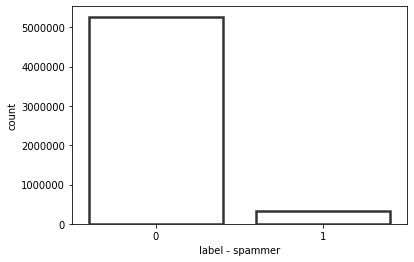

In [111]:
sns.countplot(x='label - spammer', data=userdata, linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor=".2")

Some work needs to be done to make this data ready for our deep learning models.
We would have to:
* one hot encode sex m/f labels
* one hot encode agegroup by percentailes
* one hot encode timePassesdValidation by percentailes

In [112]:
age_pd = pd.get_dummies(userdata.ageGroup)

In [113]:
time_pd = pd.get_dummies(userdata.timePassesdValidation)

In [114]:
sex_pd = pd.get_dummies(userdata['sex M/F'], drop_first=True)

In [115]:
# pd.concat([relations, ], axis=1)
# pd.concat([relations, time_pd], axis=1)
one_hot_userdata = pd.concat([userdata, sex_pd, time_pd, age_pd], axis=1)

In [116]:
one_hot_userdata.head()

,pers. id,sex M/F,timePassesdValidation,ageGroup,label - spammer,M,0.0,0.0125,0.025,0.0375,...,0.975,0.9875,1.0,10,20,30,40,50,60,70
0,1,M,0.9000,30,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,F,1.0000,20,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,M,0.1375,30,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,M,0.3875,20,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,M,0.0125,20,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [117]:
one_hot_userdata = one_hot_userdata.drop(columns='sex M/F')
one_hot_userdata = one_hot_userdata.drop(columns='ageGroup')
one_hot_userdata = one_hot_userdata.drop(columns='label - spammer')
one_hot_userdata = one_hot_userdata.drop(columns='timePassesdValidation')

In [118]:
# adding the label to the end of the dataframe
one_hot_userdata = pd.concat([one_hot_userdata, userdata['label - spammer']], axis=1)

In [125]:
one_hot_userdata.head()

,pers. id,M,0.0,0.0125,0.025,0.0375,0.05,0.0625,0.075,0.0875,...,0.9875,1.0,10,20,30,40,50,60,70,label - spammer
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,not_spammer
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,not_spammer
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,not_spammer
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,not_spammer
4,5,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,not_spammer


In [124]:
one_hot_userdata.loc[one_hot_userdata['label - spammer'] == 0, 'label - spammer'] = 'not_spammer'
one_hot_userdata.loc[one_hot_userdata['label - spammer'] == 1, 'label - spammer'] = 'spammer'

In [127]:
# exporting the new data so we have it for later use.
one_hot_userdata.to_csv('/Volumes/Samsung_T5/deep_learning_data/social_spammer_dataset/preprocessed_data/userdata.nodes', sep='\t', header = False, index=False)

In [129]:
pd.read_csv('/Volumes/Samsung_T5/deep_learning_data/social_spammer_dataset/preprocessed_data/userdata.nodes',sep="\t", header=None)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,not_spammer
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,not_spammer
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,not_spammer
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,not_spammer
4,5,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,not_spammer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607442,5607444,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,not_spammer
5607443,5607445,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,not_spammer
5607444,5607446,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,not_spammer
5607445,5607447,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,not_spammer


### For the relations we only need to remove a couple of columns that is not needed to get our graph.

In [81]:
relations = pd.read_csv("/Volumes/Samsung_T5/deep_learning_data/social_spammer_dataset/relations_subset_5000.csv", sep="\t", names=["day", "time_ms", "src", "dst", "relation"])

In [82]:
relations.head()

,day,time_ms,src,dst,relation
0,9,9560090,3185072,1528455,4
1,6,35599390,5148962,3748312,5
2,6,82121249,4463760,64388,6
3,7,14012098,4884226,75811,3
4,2,41217023,625,564072,6


Since we are really only interested in the src and dst for our graph to be created we will disredard the rest of the columns.

In [83]:
relations.drop(columns = ['day', 'time_ms', 'relation'], inplace=True)

We save the data for later user.

In [84]:
relations.head()

,src,dst
0,3185072,1528455
1,5148962,3748312
2,4463760,64388
3,4884226,75811
4,625,564072


In [88]:
relations.to_csv('/Volumes/Samsung_T5/deep_learning_data/social spammer dataset/preprocessed_data/relations.edges', sep="\t", header=False, index=False)

In [89]:
relations_import = pd.read_csv('/Volumes/Samsung_T5/deep_learning_data/social spammer dataset/preprocessed_data/relations.edges',sep="\t", header=None)

In [90]:
relations_import

,0,1
0,3185072,1528455
1,5148962,3748312
2,4463760,64388
3,4884226,75811
4,625,564072
...,...,...
4995,1863471,5333852
4996,178627,502784
4997,2038748,555573
4998,28562,1344471
